In [2]:
import drawsvg as draw

In [50]:
class SPlotter:
    def __init__(self, size, border=None, rect=None, pixel_scale=1):
        """
        size: (width, height) of the plot in device coordinates
        border: (left, top, right, bottom) of the plot in device coordinates
        rect: (x_min, y_min, x_max, y_max) of the plot in data coordinates, gets mapped to canvas' device coordinates
        pixel_scale: scale of the plot in pixels per device coordinate
        """
        self.axis_x1_border = 10
        self.axis_x2_border = 10
        self.axis_y_border = 20
        self.size = size

        if border is None:
            border = (0, 0, 0, 0)
        self.canvas = (border[0]+self.axis_x1_border, border[1], size[0] - border[2] - self.axis_x2_border, size[1] - border[3])

        self.rect = rect

        self.arrow_height = 8
        self.arrow_width = 3


        self.d = draw.Drawing(size[0], size[1], origin=(0,0))
        self.pixel_scale = pixel_scale
        self.d.set_pixel_scale(pixel_scale)

        self.d.append(draw.Rectangle(0, 0, size[0], size[1], fill='yellow'))
        self.d.append(draw.Rectangle(self.canvas[0], self.canvas[1], self.canvas[2], self.canvas[3], fill='white'))

    def scale_x(self, x):
        return (x - self.rect[0]) / (self.rect[2] - self.rect[0]) * (self.canvas[2] - self.canvas[0]) + self.canvas[0]
    
    def scale_y(self, y):
        return self.size[1] - ((y - self.rect[1]) / (self.rect[3] - self.rect[1]) * (self.canvas[3] - self.canvas[1]) + self.canvas[1])
    
    def scale_xc(self, x):
        return (x - self.canvas[0]) / (self.canvas[2] - self.canvas[0]) * (self.rect[2] - self.rect[0]) + self.rect[0]
    
    def scale_yc(self, y):
        return ((self.size[1] -y) - self.canvas[1]) / (self.canvas[3] - self.canvas[1]) * (self.rect[3] - self.rect[1]) + self.rect[1]
    
    def scale_point(self, x, y):
        return (self.scale_x(x), self.scale_y(y))

    def scale_pointc(self, x, y):
        return (self.scale_xc(x), self.scale_yc(y))
    
    def add_line(self, x1, y1, x2, y2):
        xc1, yc1 = self.scale_point(x1, y1)
        xc2, yc2 = self.scale_point(x2, y2)
        self.d.append(draw.Line(xc1, yc1, xc2, yc2, stroke='gray'))

    def add_linec(self, xc1, yc1, xc2, yc2):
        self.d.append(draw.Line(xc1, yc1, xc2, yc2, stroke='gray'))

    def add_axis(self, arrows=True):
        self.add_line(self.rect[0], 0, self.rect[2], 0)
        self.add_line(0, self.rect[1], 0, self.rect[3])
        if arrows is True:
            x_arrow_tip = (self.rect[2], 0)
            y_arrow_tip = (0, self.rect[3])
            x_arrow_tipc = self.scale_point(*x_arrow_tip)
            y_arrow_tipc = self.scale_point(*y_arrow_tip)
            for d in range(-self.arrow_width, self.arrow_width+1):
                self.add_linec(*x_arrow_tipc, x_arrow_tipc[0] - self.arrow_height, x_arrow_tipc[1] - d)
                self.add_linec(*y_arrow_tipc, y_arrow_tipc[0] - d, y_arrow_tipc[1] + self.arrow_height)
            # self.add_linec(*x_arrow_tipc, x_arrow_tipc[0] - 10, x_arrow_tipc[1] + 5)
            # self.add_linec(*y_arrow_tipc, y_arrow_tipc[0] + 5, y_arrow_tipc[1] + 10)
            


In [51]:
pl = SPlotter(size=(800, 300), border=(5,5,5,5), rect=(-10, -10, 10, 10), pixel_scale=1)


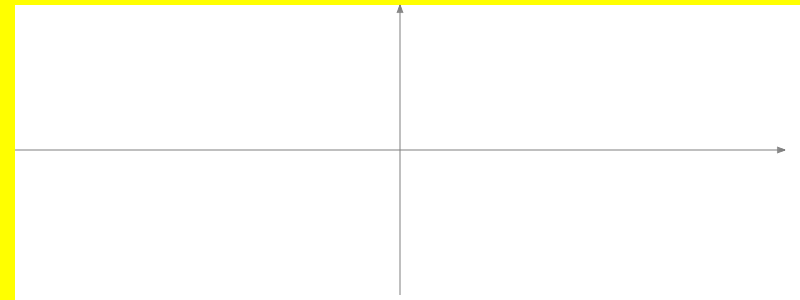

In [52]:
pl.add_axis(arrows=True)
pl.d